<a href="https://colab.research.google.com/github/DivyanshiPayal22/champagne_sales/blob/main/champagne_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving perrin-freres-monthly-champagne-.csv to perrin-freres-monthly-champagne-.csv
       month   sales
0 1964-01-01  2815.0
1 1964-02-01  2672.0
2 1964-03-01  2755.0
3 1964-04-01  2721.0
4 1964-05-01  2946.0


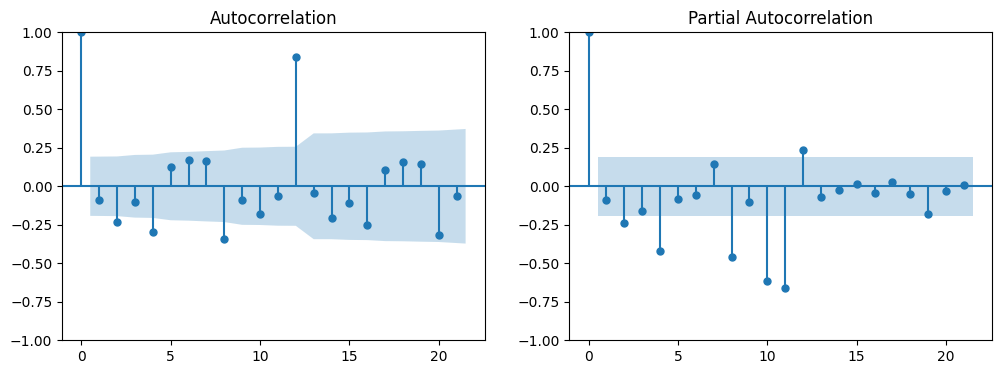

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Mon, 10 Jun 2024   AIC                           1911.627
Time:                        11:28:08   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.329      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.0

In [ ]:
from google.colab import files


uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
data = pd.read_csv('perrin-freres-monthly-champagne-.csv')
data.head()
data.columns=("month","sales")
data.head()
data.tail()
data.drop(105,axis=0,inplace=True)
data.drop(106,axis=0,inplace=True)
data['month'] = pd.to_datetime(data['month'])

print(data.head())
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['month'],
                         y=data['sales'],
                         mode='lines', name='Sales'))
fig.update_layout(title='yearly champagne sales',
                  xaxis_title='month',
                  yaxis_title='sales')
fig.show()
#predictions
time_series = data.set_index('month')['sales']
differenced_series = time_series.diff().dropna()

# Plot ACF and PACF of differenced time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()
p, d, q = 1, 1, 1
model = ARIMA(time_series, order=(p, d, q))
results = model.fit()
print(results.summary())